In [45]:
# Importation des packages et librairiie

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# word embedding
import string
import nltk
import gensim
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import string

# Téléchargement des ressources NLTK nécessaires (à faire une seule fois)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('all')


In [46]:
## Package pour entrainer notre percetron 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

#pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Chargement de base PRC

In [86]:
df=pd.read_excel("Data_Breach_Chronology_sample.xlsx")
data=pd.read_csv("PRC Data Breach Chronology_Download_May_2022.csv")

In [48]:
# Liste des variables
df.columns

Index(['id', 'source', 'org_name', 'acceptable_names', 'org_name_explanation',
       'reported_date', 'breach_date', 'end_breach_date', 'incident_details',
       'date_info_explanation', 'information_affected',
       'information_affected_explanation', 'organization_type',
       'organization_type_explanation', 'breach_type',
       'breach_type_explanation', 'group_uuid', 'normalized_org_name',
       'normalized_org_name_explanation', 'group_org_breach_type',
       'group_org_breach_type_explanation', 'group_org_type',
       'group_org_type_explanation', 'total_affected', 'residents_affected',
       'impact_info_explanation', 'breach_location_street',
       'breach_location_city', 'breach_location_state', 'breach_location_zip',
       'breach_location_country', 'breach_location_explanation', 'tags',
       'source_url', 'notification_url_original', 'created_at', 'updated_at'],
      dtype='object')

## Traitement de données 

In [49]:
df=pd.read_excel("Data_Breach_Chronology_sample.xlsx")
# Selection des variables d'intérêts
variables = [
    "id",
    "organization_type",
    "incident_details",
    "breach_type",
    "reported_date",
    "breach_date",
    "end_breach_date",
    "total_affected",
    "residents_affected",
    "breach_location_city",
    "breach_location_state",
    "breach_location_country"
]
df=df[variables]
df['total_affected'] = pd.to_numeric(df['total_affected'], errors='coerce')

df3=df.copy()

In [50]:
# Type de variable 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       100 non-null    object 
 1   organization_type        100 non-null    object 
 2   incident_details         100 non-null    object 
 3   breach_type              100 non-null    object 
 4   reported_date            100 non-null    object 
 5   breach_date              100 non-null    object 
 6   end_breach_date          100 non-null    object 
 7   total_affected           48 non-null     float64
 8   residents_affected       100 non-null    object 
 9   breach_location_city     100 non-null    object 
 10  breach_location_state    100 non-null    object 
 11  breach_location_country  100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.5+ KB


In [51]:

df_filtré = df[df['total_affected'] != 'UNKN']
#df_filtré=df_filtré[df_filtré['breach_date'] != 'UNKN']
df_filtré['breach_date'] = pd.to_datetime(df_filtré['breach_date'], errors='coerce')
df_filtré['total_affected'] = pd.to_numeric(df_filtré['total_affected'], errors='coerce')

In [52]:
df_filtré.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       100 non-null    object        
 1   organization_type        100 non-null    object        
 2   incident_details         100 non-null    object        
 3   breach_type              100 non-null    object        
 4   reported_date            100 non-null    object        
 5   breach_date              43 non-null     datetime64[ns]
 6   end_breach_date          100 non-null    object        
 7   total_affected           48 non-null     float64       
 8   residents_affected       100 non-null    object        
 9   breach_location_city     100 non-null    object        
 10  breach_location_state    100 non-null    object        
 11  breach_location_country  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), obj

In [53]:
df_filtré.head(4)

,id,organization_type,incident_details,breach_type,reported_date,breach_date,end_breach_date,total_affected,residents_affected,breach_location_city,breach_location_state,breach_location_country
0,9e38b3ea-ae63-5d83-aaed-73952834000f,EDU,The Indiana Office of the Attorney General rep...,UNKN,2020-10-30,2019-12-01,UNKN,1976.0,11,UNKN,UNKN,UNKN
1,3baa552d-66af-5371-b32e-05aa3c540031,BSF,"On February 25, 2021, the Maryland Office of t...",HACK,2021-02-25,2020-12-21,2020-12-21,383.0,383,Towson,MD,United States
2,1252da3b-8848-5303-a5eb-bbd6232ee86f,BSR,The California Office of the Attorney General ...,HACK,2022-03-16,2021-08-29,2022-01-31,NaN,UNKN,Fenton,MO,United States
3,78d61170-9d43-52f8-b17e-1f3b53f5dced,MED,"On October 9, 2018, the Minnesota Department o...",HACK,2018-10-09,NaT,UNKN,20800.0,UNKN,UNKN,MN,UNKN


In [54]:
df_filtré['incident_details'][1]

'On February 25, 2021, the Maryland Office of the Attorney General reported a data breach involving WMS Partners, LLC that occurred on December 21, 2020, due to phishing. The breach affected 383 Maryland residents, potentially compromising personal information such as names, physical addresses, account numbers, the last four digits of social security numbers, dates of birth, and driver’s license numbers.'

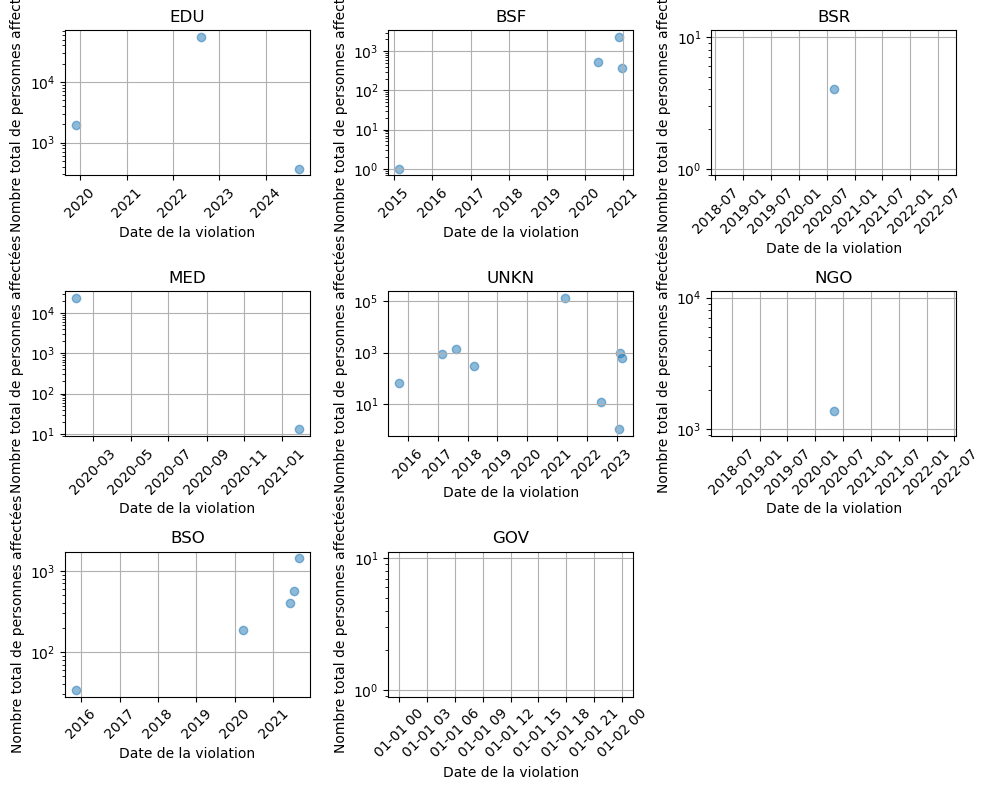

In [55]:
# Conversion de la date
df_filtré['breach_date'] = pd.to_datetime(df_filtré['breach_date'])

# Liste des types d'organisation uniques
unique_org_types = df_filtré['organization_type'].unique()

# Définir la grille : 3 lignes, 3 colonnes
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8), sharex=False)

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Tracer chaque sous-graphe
for i, org_type in enumerate(unique_org_types):
    ax = axes[i]
    subset = df_filtré[df_filtré['organization_type'] == org_type]
    ax.scatter(subset['breach_date'], subset['total_affected'], alpha=0.5)
    ax.set_yscale('log')
    ax.set_title(org_type)
    ax.set_xlabel('Date de la violation')
    ax.set_ylabel('Nombre total de personnes affectées')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Rotation des dates pour lisibilité

# Supprimer les axes inutilisés s'il y a moins de 9 types
for j in range(len(unique_org_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [56]:
# Analyse du nombre de personnes affectées

# Statistiques descriptives pour la variable 'total_affected'
stats = df_filtré['total_affected'].describe()

print(stats)

count    4.800000e+01
mean     2.342600e+05
std      1.239422e+06
min      1.000000e+00
25%      1.720000e+02
50%      6.295000e+02
75%      1.795000e+04
max      8.500000e+06
Name: total_affected, dtype: float64


La moyenne est très décalée par rapport à la médiane ce qui montre que notre variable qui évalue la sévérité d'une attaque cyber est à queue lourde. Le graphique qui suite conforte bien nos observations :

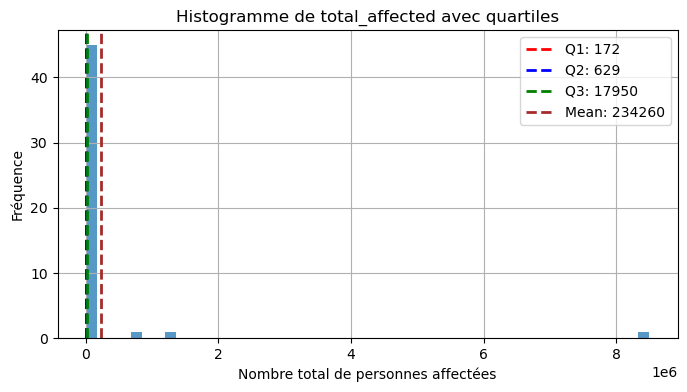

In [57]:
# Calcul des quartiles
Q1 = df_filtré['total_affected'].quantile(0.25)
Q2 = df_filtré['total_affected'].quantile(0.50)
Q3 = df_filtré['total_affected'].quantile(0.75)
moy=np.mean(df_filtré['total_affected'])

# Création de l'histogramme
plt.figure(figsize=(8, 4))
plt.hist(df_filtré['total_affected'], bins=50, alpha=0.75)

# Ajout des lignes verticales pour les quartiles
plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2, label=f'Q1: {int(Q1)}')
plt.axvline(Q2, color='blue', linestyle='dashed', linewidth=2, label=f'Q2: {int(Q2)}')
plt.axvline(Q3, color='green', linestyle='dashed', linewidth=2, label=f'Q3: {int(Q3)}')
plt.axvline(moy, color='brown', linestyle='dashed', linewidth=2, label=f'Mean: {int(moy)}')

# Titres et légendes
plt.title('Histogramme de total_affected avec quartiles')
plt.xlabel('Nombre total de personnes affectées')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
# Quantile 60%
Q40 = df_filtré['total_affected'].quantile(0.6)
Q40

1378.0

In [59]:
import pandas as pd

# Calcul des statistiques descriptives groupées
stats = df_filtré.groupby('organization_type')['total_affected'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

# Renommer les colonnes pour correspondre au tableau souhaité
stats = stats.rename(columns={
    'count': 'Number',
    'mean': 'Mean',
    '25%': 'q0.25',
    '50%': 'Median',
    '75%': 'q0.75',
    '90%': 'q0.9',
    '95%': 'q0.95',
    'max': 'Max'
})
# Afficher le tableau
base=stats[['Number', 'Mean', 'q0.25', 'Median', 'q0.75', 'q0.9', 'q0.95', 'Max']]
base

,Number,Mean,q0.25,Median,q0.75,q0.9,q0.95,Max
organization_type,,,,,,,,
BSF,5.0,1.700644e+06,383.00,517.0,2318.00,5100927.2,6800463.60,8500000.0
BSO,6.0,5.190000e+02,242.00,450.0,543.25,995.5,1214.25,1433.0
BSR,4.0,1.077500e+02,19.75,73.0,161.00,233.0,257.00,281.0
EDU,3.0,1.922333e+04,1173.00,1976.0,28650.00,44654.4,49989.20,55324.0
GOV,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MED,16.0,1.563991e+05,923.25,18900.0,44188.00,472720.5,971938.75,1351432.0
NGO,3.0,4.810000e+02,28.50,55.0,720.50,1119.8,1252.90,1386.0
UNKN,11.0,1.601973e+04,38.00,629.0,1168.50,32008.0,86004.00,140000.0


In [60]:
# Analyse du nombre d'incidences en fonction du type d'organisation touchée

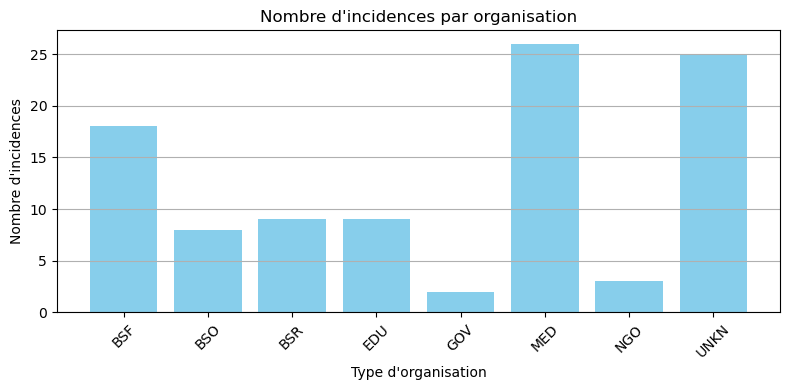

In [61]:
# Compter les occurrences par année
yearly_counts = df_filtré['organization_type'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par organisation")
plt.xlabel("Type d'organisation")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [62]:
# Analyse du nombre d'incidences en fonction du type de brèche

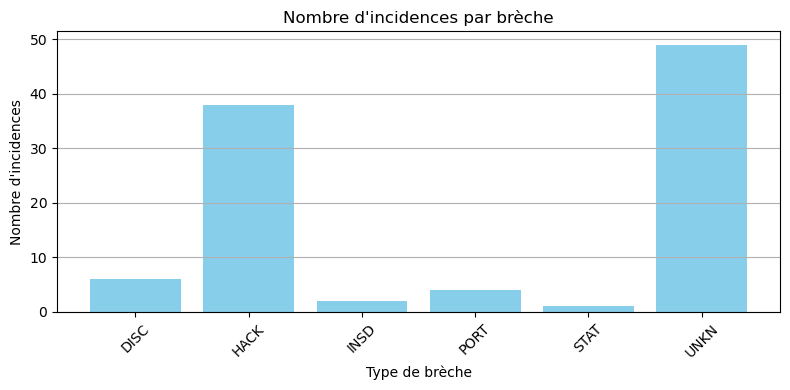

In [63]:

# Compter les occurrences par année
yearly_counts = df_filtré['breach_type'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par brèche")
plt.xlabel("Type de brèche")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [64]:
# Analyse du nombre d'incidences en fonction de l'année

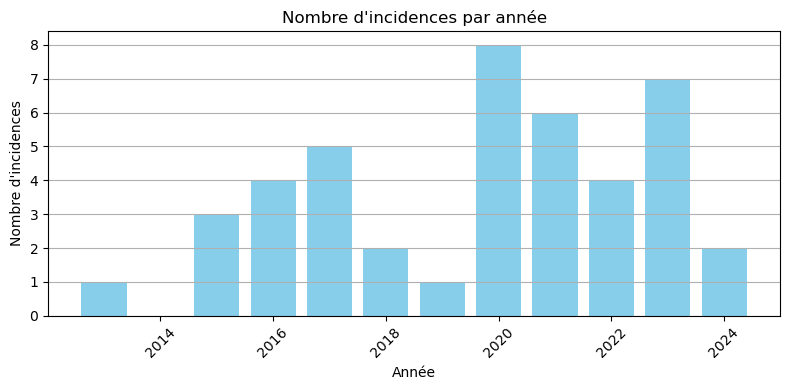

In [65]:

# Extraire l'année
df_filtré['year'] = df_filtré['breach_date'].dt.year

# Compter les occurrences par année
yearly_counts = df_filtré['year'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Réseau de neurone 

### Word embeding Algorithme du Word2vec

#### Nettoyage du corpus

In [66]:
#corpus[0]

In [67]:
#récupérer sous forme de liste
corpus = df['incident_details'].tolist()

# Supression de date
def remove_dates(text):
    # Supprimer les formats de date : "December 1, 2019"
    text = re.sub(r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}', '', text)
    
    # Supprimer les mois abrégés : "Dec 1, 2019"
    text = re.sub(r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\.?\s+\d{1,2},\s+\d{4}', '', text)
    
    # Supprimer les années seules : "2020", "1998"
    text = re.sub(r'\b\d{4}\b', '', text)
    
    return text

corpus=[remove_dates(doc) for doc in corpus]


# Nettoyage et tokénisation 
# fonction de traitement 
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Mise en minuscules + tokenisation
    tokens = [t for t in tokens if t not in string.punctuation]  # Retirer ponctuation
    tokens = [t for t in tokens if t not in stopwords.words('english')]  # Retirer stopwords
    return tokens

# Appliquer le prétraitement
tokenized_corpus = [preprocess(doc) for doc in corpus]


In [68]:
tokenized_corpus[0]

['indiana',
 'office',
 'attorney',
 'general',
 'reported',
 'des',
 'moines',
 'area',
 'community',
 'college',
 'experienced',
 'data',
 'breach',
 'affecting',
 'total',
 '1,976',
 'individuals',
 '11',
 'residents',
 'indiana',
 'breach',
 'notification',
 'reported']

In [69]:
# Création des bigrams et trigrams
bigram_model = Phrases(tokenized_corpus, min_count=1, threshold=1)
trigram_model = Phrases(bigram_model[tokenized_corpus], threshold=1)

# Convertir en Phraser pour meilleure performance
bigram_phraser = Phraser(bigram_model)
trigram_phraser = Phraser(trigram_model)

# Appliquer les phrasers
bigrams = [bigram_phraser[doc] for doc in tokenized_corpus]
trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in tokenized_corpus]

# Affichage des résultats
print("Tokens nettoyés :", tokenized_corpus[0])
print("Bigrams :", bigrams[0])
print("Trigrams :", trigrams[0])

Tokens nettoyés : ['indiana', 'office', 'attorney', 'general', 'reported', 'des', 'moines', 'area', 'community', 'college', 'experienced', 'data', 'breach', 'affecting', 'total', '1,976', 'individuals', '11', 'residents', 'indiana', 'breach', 'notification', 'reported']
Bigrams : ['indiana_office', 'attorney_general', 'reported', 'des', 'moines', 'area', 'community_college', 'experienced_data', 'breach_affecting', 'total', '1,976', 'individuals', '11', 'residents_indiana', 'breach_notification', 'reported']
Trigrams : ['indiana_office', 'attorney_general_reported', 'des', 'moines', 'area', 'community_college', 'experienced_data_breach_affecting', 'total', '1,976', 'individuals', '11', 'residents_indiana', 'breach_notification', 'reported']


####  Word2Vec avec Gensim proprement dit

In [70]:
#word2vec
from gensim.models import Word2Vec
modele = Word2Vec(trigrams,min_count=1,vector_size=2,window=5)

In [71]:
#propriété "wv" -> wordvector
words = modele.wv

#affichage des termes de leur index
words.key_to_index

{'breach_involving': 0,
 'consumer_affairs': 1,
 'massachusetts_office': 2,
 'social_security': 3,
 'business_regulation_reported_data': 4,
 'affected': 5,
 'numbers': 6,
 'attorney_general_reported_data': 7,
 'attorney_general_reported': 8,
 'individuals': 9,
 'information': 10,
 'health_human_services_reported': 11,
 'u.s._department': 12,
 'electronic_records': 13,
 'data_breach': 14,
 'breach_affected': 15,
 'personal_information': 16,
 'indiana_office': 17,
 'residents': 18,
 'new_hampshire': 19,
 'unauthorized_access': 20,
 'maryland_office': 21,
 'breach_occurred': 22,
 'affecting': 23,
 'individuals_including': 24,
 'maryland_residents': 25,
 'occurred': 26,
 'security_numbers': 27,
 'experienced_data_breach_affecting': 28,
 'breach': 29,
 'reported': 30,
 'justice_reported': 31,
 'incident_affecting': 32,
 'involved': 33,
 'inc.': 34,
 'data_breach_involving': 35,
 'dates_birth': 36,
 'including_names': 37,
 'maine_office': 38,
 'breach_involved': 39,
 'business_regulation_rep

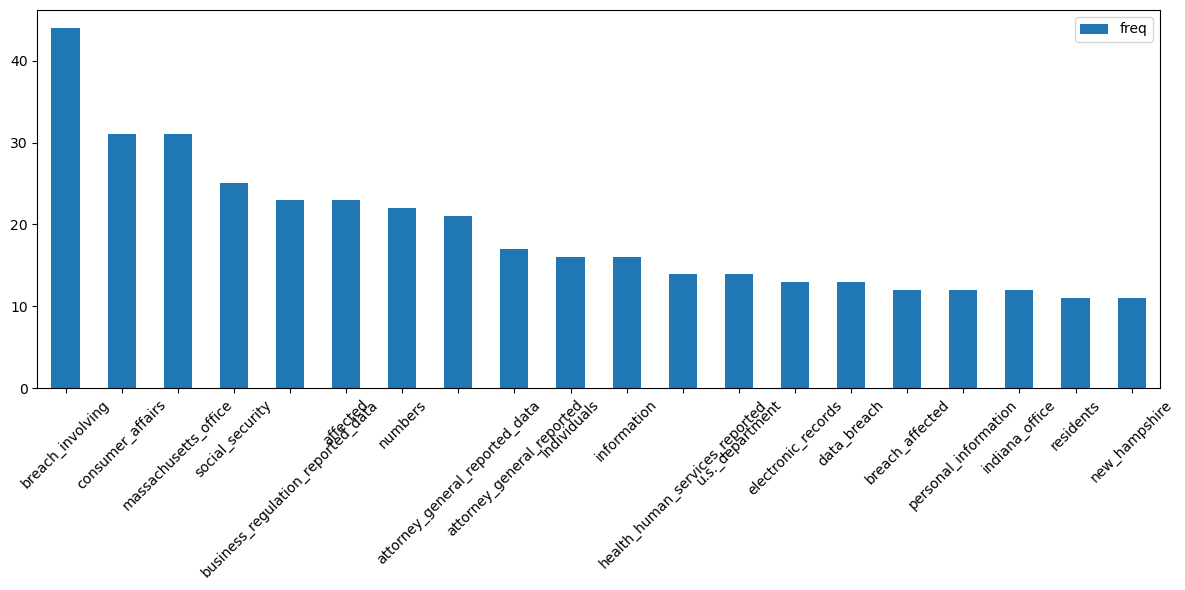

In [72]:
# initialisation de l'histogramme
freq = dict()
for v in list(words.index_to_key):
    freq[v] = 0
    
# comptage des occurrences
for d in trigrams:
    for w in d:
        freq[w] += 1

d=dict(list(freq.items())[:20])
df1 = pd.DataFrame({'freq':d.values()}, index=d.keys())

ax = df1.plot.bar(rot=45,figsize=(12, 6))
ax.tick_params(axis='x', labelsize=10)  # ajuster la taille des étiquettes
plt.tight_layout()
plt.show()

In [73]:
#coordonnées 
vec2 = words['social_security']
print(vec2)
vec1 = words['individuals']
print(vec1)

[0.35354015 0.4551764 ]
[-0.39857256 -0.47111708]


In [74]:
print(np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))

-0.9991266


In [75]:
#coordonnées 
vec2 = words['social_security']
print(vec2)
vec1 = words['individuals']
print(vec1)

[0.35354015 0.4551764 ]
[-0.39857256 -0.47111708]


In [76]:
print(np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))

-0.9991266


In [77]:
#similarité de gensim
words.similarity('individuals','social_security')

-0.9991265

In [78]:
#les termes les plus proches de "boring"
words.most_similar("social_security",topn=20)

[('website', 0.9999681115150452),
 ('concluded', 0.9999569654464722),
 ('ultrafabrics', 0.9999409317970276),
 ('credit_debit', 0.9998475313186646),
 ('worcester', 0.9998411536216736),
 ('seiu', 0.9998353123664856),
 ('breach_may', 0.9998160600662231),
 ('resources', 0.9997771978378296),
 ('120,391', 0.9997478723526001),
 ('partners', 0.9997041821479797),
 ('stole', 0.9996739625930786),
 ('affecting_personal', 0.9994251132011414),
 ('illinois', 0.9991669058799744),
 ('personnel', 0.9991531372070312),
 ('computer_network', 0.9990767240524292),
 ('financial_account', 0.9989498853683472),
 ('mulkay', 0.9988950490951538),
 ('data_breach_involving', 0.9986581802368164),
 ('locations', 0.9985178112983704),
 ('consumer', 0.9983582496643066)]

In [79]:
#les termes les plus proches de "boring"
words.most_similar("social_security",topn=20)

[('website', 0.9999681115150452),
 ('concluded', 0.9999569654464722),
 ('ultrafabrics', 0.9999409317970276),
 ('credit_debit', 0.9998475313186646),
 ('worcester', 0.9998411536216736),
 ('seiu', 0.9998353123664856),
 ('breach_may', 0.9998160600662231),
 ('resources', 0.9997771978378296),
 ('120,391', 0.9997478723526001),
 ('partners', 0.9997041821479797),
 ('stole', 0.9996739625930786),
 ('affecting_personal', 0.9994251132011414),
 ('illinois', 0.9991669058799744),
 ('personnel', 0.9991531372070312),
 ('computer_network', 0.9990767240524292),
 ('financial_account', 0.9989498853683472),
 ('mulkay', 0.9988950490951538),
 ('data_breach_involving', 0.9986581802368164),
 ('locations', 0.9985178112983704),
 ('consumer', 0.9983582496643066)]

In [80]:
# récupérer les données dans un data frame
df = pd.DataFrame(words.vectors,columns=['V1','V2'],index=words.key_to_index.keys())
print(df)

                                         V1        V2
breach_involving                  -0.012723  0.015734
consumer_affairs                   0.269479  0.456147
massachusetts_office              -0.455890 -0.356401
social_security                    0.353540  0.455176
business_regulation_reported_data -0.234115 -0.182212
...                                     ...       ...
west                               0.323891  0.472847
virginia                           0.355740  0.338816
claims                             0.069566 -0.487928
government                         0.233742 -0.026699
numbers_financial                  0.321646  0.089676

[803 rows x 2 columns]


In [81]:
#quelques mots clés
mots = ['breach_involving','social_security','debit_numbers','numbers_ssns','protected_health','provided','involving_unauthorized']
dfMots = df.loc[mots,:]
print(dfMots)

                              V1        V2
breach_involving       -0.012723  0.015734
social_security         0.353540  0.455176
debit_numbers           0.404362 -0.346531
numbers_ssns            0.084686  0.094502
protected_health        0.470189  0.335217
provided                0.311466 -0.074443
involving_unauthorized  0.512732 -0.214852


C:\Users\FranckOséeDOUNTIOZAB\AppData\Local\Temp\ipykernel_1640\1880841890.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))


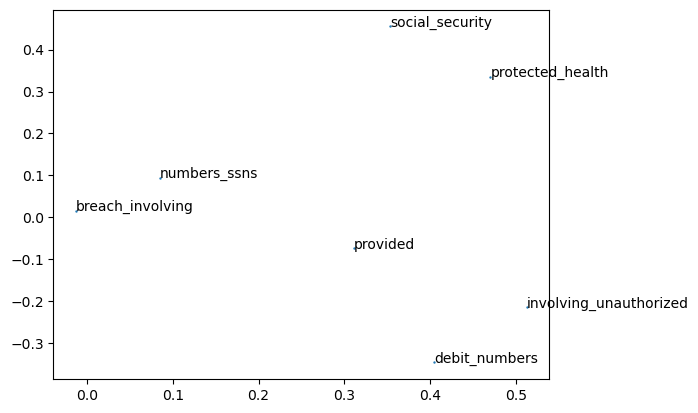

In [82]:
#graphique dans le plan
import matplotlib.pyplot as plt
plt.scatter(dfMots.V1,dfMots.V2,s=0.5)
for i in range(dfMots.shape[0]):
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

#### Coordonnées des documents à partir des termes

In [83]:
#fonction pour transformer un document en vecteur
#à partir des tokens qui le composent
#entrée : doc à traiter
#         modèle préentrainé
#sortie : vecteur représentant le document
def my_doc_2_vec(doc,trained):
    #dimension de représentation
    p = trained.vectors.shape[1]
    #initialiser le vecteur
    vec = np.zeros(p)
    #nombre de tokens trouvés
    nb = 0
    #traitement de chaque token du document
    for tk in doc:
        #ne traiter que les tokens reconnus
        try:
            values = trained[tk]
            vec = vec + values
            nb = nb + 1.0
        except:
            pass
    #faire la moyenne des valeurs
    #uniquement si on a trové des tokens reconnus bien sûr
    if (nb > 0.0):
        vec = vec/nb
    #renvoyer le vecteur
    #si aucun token trouvé, on a un vecteur de valeurs nulles
    return vec

In [84]:
#traiter les documents du corpus corpus
docsVec = list()
#pour chaque document du corpus nettoyé
for doc in trigrams:
    #calcul de son vecteur
    vec = my_doc_2_vec(doc,words)
    #ajouter dans la liste
    docsVec.append(vec)
#transformer en matrice numpy
matVec = np.array(docsVec)
print(matVec.shape)

(100, 2)


In [85]:
#transformer en data frame
df2 = pd.DataFrame(matVec,columns=["v"+str(i+1) for i in range(matVec.shape[1])])
df2['label'] = D.label
df2.head()

NameError: name 'D' is not defined

<Axes: xlabel='v1', ylabel='v2'>

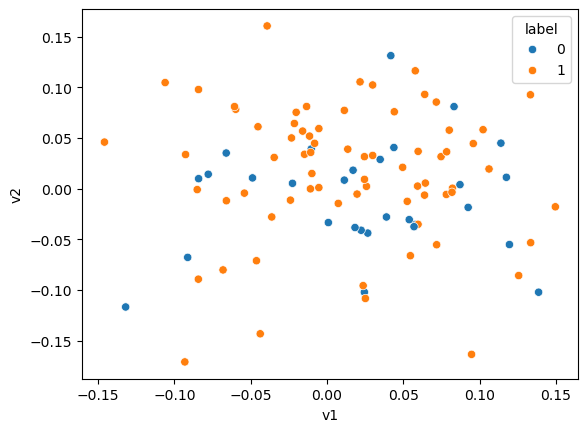

In [ ]:
#refaire le graphique avec la polarité
sns.scatterplot(data=df2,x='v1',y='v2',hue='label')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       100 non-null    object 
 1   organization_type        100 non-null    object 
 2   incident_details         100 non-null    object 
 3   breach_type              100 non-null    object 
 4   reported_date            100 non-null    object 
 5   breach_date              100 non-null    object 
 6   end_breach_date          100 non-null    object 
 7   total_affected           48 non-null     float64
 8   residents_affected       100 non-null    object 
 9   breach_location_city     100 non-null    object 
 10  breach_location_state    100 non-null    object 
 11  breach_location_country  100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.5+ KB


# Doc2Vec avec gensim

In [ ]:
# Réorganiser la base de données 
D = df3[['incident_details', 'total_affected']].copy()  # on extrait les colonnes utiles
D['id'] = range(1, len(D) + 1)  # création de la colonne id de 1 à N

# Définir un seuil K
# Quantile 60%
K = df['total_affected'].quantile(0.6)

# Remplacer les valeurs manquantes (NaN) dans total_affected par 0 ou 1 aléatoirement
D['total_affected'] = D['total_affected'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(range(1, int(max(df['total_affected']))))
)
# Création de la variable label
D['label'] = (D['total_affected'] > K).astype(int)  # 1 si > K, sinon 0

# Remplacer les valeurs manquantes (NaN) dans total_affected par 0 ou 1 aléatoirement
D['total_affected'] = D['total_affected'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice([0, 1])
)

In [ ]:
# Réorganiser les colonnes 
D = D[['id', 'incident_details', 'label']]

# Affichage
D

,id,incident_details,label
0,1,The Indiana Office of the Attorney General rep...,1
1,2,"On February 25, 2021, the Maryland Office of t...",0
2,3,The California Office of the Attorney General ...,1
3,4,"On October 9, 2018, the Minnesota Department o...",1
4,5,The Montana Department of Justice reported on ...,1
...,...,...,...
95,96,The Montana Department of Justice reported a d...,1
96,97,The California Office of the Attorney General ...,1
97,98,The California Office of the Attorney General ...,1
98,99,The Maine Office of the Attorney General repor...,1


In [ ]:
#tagger les documents avec leur identifiant
from gensim.models.doc2vec import TaggedDocument
tagged_docs = [TaggedDocument(words=trigrams[i],tags=["d"+str(D.id[i])]) for i in range(len(trigrams))]

#premier doc par ex.
print(tagged_docs[0])

TaggedDocument<['indiana_office', 'attorney_general_reported', 'des', 'moines', 'area', 'community_college', 'experienced_data_breach_affecting', 'total', '1,976', 'individuals', '11', 'residents_indiana', 'breach_notification', 'reported'], ['d1']>


In [ ]:
tagged_docs[1]

TaggedDocument(words=['maryland_office', 'attorney_general_reported_data', 'breach_involving', 'wms', 'partners', 'llc', 'occurred_due', 'phishing', 'breach_affected', '383', 'maryland_residents', 'potentially_compromising', 'personal_information', 'names', 'physical', 'addresses', 'account_numbers', 'last', 'four', 'digits', 'social_security', 'numbers', 'dates_birth', 'driver_’', 'license_numbers'], tags=['d2'])

In [ ]:
#doc2vec
from gensim.models.doc2vec import Doc2Vec
modeleDoc = Doc2Vec(vector_size=2,min_count=1,window=5)

#construction de dictionnaire dans un premier temps
modeleDoc.build_vocab(tagged_docs)

In [ ]:
#coordonnées des termes - comme avec doc2vec
pd.DataFrame(modeleDoc.wv.vectors,columns=['V1','V2'],index=modeleDoc.wv.key_to_index.keys())

,V1,V2
breach_involving,-0.026811,0.011822
consumer_affairs,0.255167,0.450464
massachusetts_office,-0.465147,-0.355840
social_security,0.322944,0.448649
business_regulation_reported_data,-0.250771,-0.188169
...,...,...
west,0.320888,0.471904
virginia,0.352764,0.337748
claims,0.065008,-0.490215
government,0.229388,-0.026911


In [ ]:
#modélisation pour le positionnement des documents
modeleDoc.train(tagged_docs,total_examples=modeleDoc.corpus_count,epochs=100)
print(modeleDoc.dv)

KeyedVectors<vector_size=2, 100 keys>


In [ ]:
#coordonnées des documents
print(modeleDoc.dv.key_to_index)

{'d1': 0, 'd2': 1, 'd3': 2, 'd4': 3, 'd5': 4, 'd6': 5, 'd7': 6, 'd8': 7, 'd9': 8, 'd10': 9, 'd11': 10, 'd12': 11, 'd13': 12, 'd14': 13, 'd15': 14, 'd16': 15, 'd17': 16, 'd18': 17, 'd19': 18, 'd20': 19, 'd21': 20, 'd22': 21, 'd23': 22, 'd24': 23, 'd25': 24, 'd26': 25, 'd27': 26, 'd28': 27, 'd29': 28, 'd30': 29, 'd31': 30, 'd32': 31, 'd33': 32, 'd34': 33, 'd35': 34, 'd36': 35, 'd37': 36, 'd38': 37, 'd39': 38, 'd40': 39, 'd41': 40, 'd42': 41, 'd43': 42, 'd44': 43, 'd45': 44, 'd46': 45, 'd47': 46, 'd48': 47, 'd49': 48, 'd50': 49, 'd51': 50, 'd52': 51, 'd53': 52, 'd54': 53, 'd55': 54, 'd56': 55, 'd57': 56, 'd58': 57, 'd59': 58, 'd60': 59, 'd61': 60, 'd62': 61, 'd63': 62, 'd64': 63, 'd65': 64, 'd66': 65, 'd67': 66, 'd68': 67, 'd69': 68, 'd70': 69, 'd71': 70, 'd72': 71, 'd73': 72, 'd74': 73, 'd75': 74, 'd76': 75, 'd77': 76, 'd78': 77, 'd79': 78, 'd80': 79, 'd81': 80, 'd82': 81, 'd83': 82, 'd84': 83, 'd85': 84, 'd86': 85, 'd87': 86, 'd88': 87, 'd89': 88, 'd90': 89, 'd91': 90, 'd92': 91, 'd93':

In [ ]:
#data frame avec les coordonnées
dfDoc2Vec = pd.DataFrame(modeleDoc.dv.vectors,columns=['X1','X2'])
print(dfDoc2Vec)

          X1        X2
0   0.648915 -2.929711
1   1.466017 -1.769099
2   1.799427 -2.023257
3   2.455747 -3.107562
4   1.311184 -1.557100
..       ...       ...
95  1.654263 -1.783042
96  3.446244 -1.153967
97  0.666839 -2.036388
98  1.841621 -1.304346
99  2.465158 -0.847800

[100 rows x 2 columns]


<Axes: xlabel='X1', ylabel='X2'>

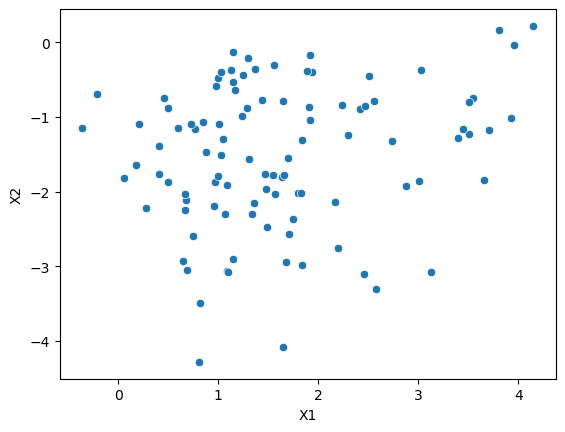

In [ ]:
#graphique
import seaborn as sns
sns.scatterplot(data=dfDoc2Vec,x='X1',y='X2')

In [ ]:
dfDoc2Vec

,X1,X2,polarite
0,0.648915,-2.929711,1
1,1.466017,-1.769099,0
2,1.799427,-2.023257,1
3,2.455747,-3.107562,1
4,1.311184,-1.557100,1
...,...,...,...
95,1.654263,-1.783042,1
96,3.446244,-1.153967,1
97,0.666839,-2.036388,1
98,1.841621,-1.304346,1


<Axes: xlabel='X1', ylabel='X2'>

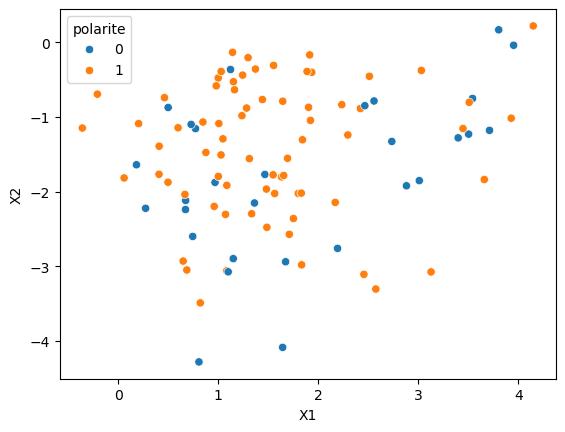

In [ ]:
#ajouter la polarité
dfDoc2Vec['polarite'] = D.label

#refaire le graphique avec la polarité
sns.scatterplot(data=dfDoc2Vec,x='X1',y='X2',hue='polarite')

### Prédiction et évaluation en test

##### Résultat  avec le modèle de vectorisation Word2vec

Il sera important tout d'abord important de subdiviser notre base de données en deux échantillons (Tran, Test) avant d'entraitner le modèle Word2vec.

C'est sur cette bases d'entrainement que sera calibrer notre perceptron multicouche et par la suite l'échantillon de test sera vectorisé et tester sur le perceptron

Ici nous N'observons pas cette démarche et splitons la base entière qui a été vectorisée dès le debut à savour la base : 

In [ ]:
df2

,v1,v2,label
0,-0.043817,-0.143127,1
1,0.024397,-0.102080,0
2,-0.016043,0.056789,1
3,0.025773,0.002279,1
4,0.071744,-0.055290,1
...,...,...,...
95,0.049475,0.021046,1
96,-0.008186,0.044711,1
97,0.024467,0.009160,1
98,-0.005413,0.059268,1


c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
✅ Accuracy: 0.7500
✅ F1-score: 0.8571

📊 Rapport complet :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

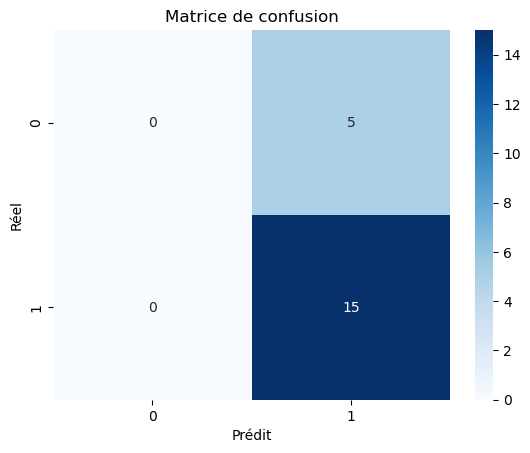

In [ ]:
# Tratement de données 
X = df2[['v1', 'v2']].values
y = df2['label'].values

# 2. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modèle MLP
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. Compilation
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 5. Entraînement
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_data=(X_test, y_test))

# 6. Prédiction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 7. Évaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print("\n📊 Rapport complet :\n")
print(classification_report(y_test, y_pred))

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

##### Résultat  avec le modèle de vectorisation Doc2vec


In [ ]:
dfDoc2Vec

,X1,X2,polarite
0,0.648915,-2.929711,1
1,1.466017,-1.769099,0
2,1.799427,-2.023257,1
3,2.455747,-3.107562,1
4,1.311184,-1.557100,1
...,...,...,...
95,1.654263,-1.783042,1
96,3.446244,-1.153967,1
97,0.666839,-2.036388,1
98,1.841621,-1.304346,1


c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
✅ Accuracy: 0.7500
✅ F1-score: 0.8485

📊 Rapport complet :

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.78      0.93      0.85        15

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20



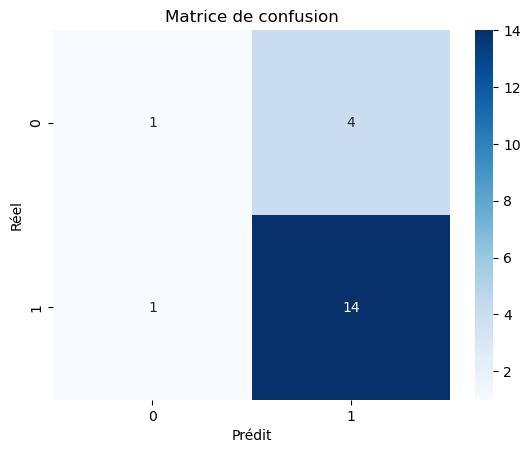

In [ ]:
# Tratement de données 
X = dfDoc2Vec[['X1', 'X2']].values
y = dfDoc2Vec['polarite'].values

# 2. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modèle MLP
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. Compilation
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 5. Entraînement
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_data=(X_test, y_test))

# 6. Prédiction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 7. Évaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print("\n📊 Rapport complet :\n")
print(classification_report(y_test, y_pred))

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

#### Travaux

In [ ]:
document_1 = "le chat mange la souris"
document_2 = "le chien regarde le canard"
document_3 = "le canard regarde le chat"
corpus = (document_1, document_2, document_3)

In [ ]:
# construction du vocabulaire
vocabulary = []
for d in corpus:
    for w in d.split(" "):
        if w not in vocabulary:
            vocabulary.append(w)


In [ ]:
vocabulary

['le', 'chat', 'mange', 'la', 'souris', 'chien', 'regarde', 'canard']

In [ ]:
# initialisation de l'histogramme
freq = dict()
for v in vocabulary:
    freq[v] = 0

{'le': 5, 'chat': 2, 'mange': 1, 'la': 1, 'souris': 1, 'chien': 1, 'regarde': 2, 'canard': 2}


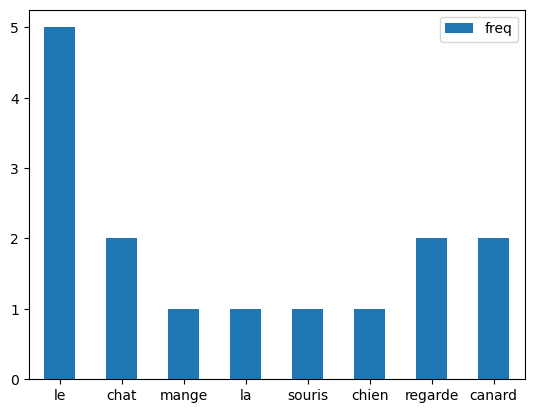

In [ ]:
# comptage des occurrences
for d in corpus:
    for w in d.split(" "):
        freq[w] += 1
print(freq)
df = pd.DataFrame({'freq':freq.values()}, index=freq.keys())
ax = df.plot.bar(rot=0)
plt.show()


In [ ]:
# calcul d'un histogramme par document
import numpy as np
V = len(vocabulary)
D = len(corpus)
tf_idf = np.zeros([D, V])
for i, d in enumerate(corpus):
    for w in d.split(" "):
        j = vocabulary.index(w)
        tf_idf[i,j] += 1
        
print(tf_idf)

[[1. 1. 1. 1. 1. 0. 0. 0.]
 [2. 0. 0. 0. 0. 1. 1. 1.]
 [2. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
vocabulary

['le', 'chat', 'mange', 'la', 'souris', 'chien', 'regarde', 'canard']

In [ ]:
corpus

('le chat mange la souris',
 'le chien regarde le canard',
 'le canard regarde le chat')

In [ ]:
enumerate(corpus)

##### Word2vec

In [ ]:
# pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# données d'entraînement tokenisation
p_1=document_1.split(" ")
p_2=document_2.split(" ")
p_3=document_3.split(" ")

corpus=[p_1,p_2,p_3]

In [ ]:
# Paramétrage de l'entraînement
model = Word2Vec(min_count=1, vector_size=5)

In [ ]:
# creation du dictionnaire 
model.build_vocab(corpus) 

In [ ]:
corpus

[['le', 'chat', 'mange', 'la', 'souris'],
 ['le', 'chien', 'regarde', 'le', 'canard'],
 ['le', 'canard', 'regarde', 'le', 'chat']]

In [ ]:
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

(7, 75)

In [ ]:
print(list(model.wv.index_to_key[ ]))  # Adjust the number to see more


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1734034339.py, line 1)

In [ ]:
model.wv['chat']

array([-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897636],
      dtype=float32)

In [ ]:
#model.wv['souris']
print(model.wv.most_similar(positive=['chien'] ,topn=3))


[('canard', 0.072651706635952), ('regarde', -0.06693901866674423), ('la', -0.08407305926084518)]


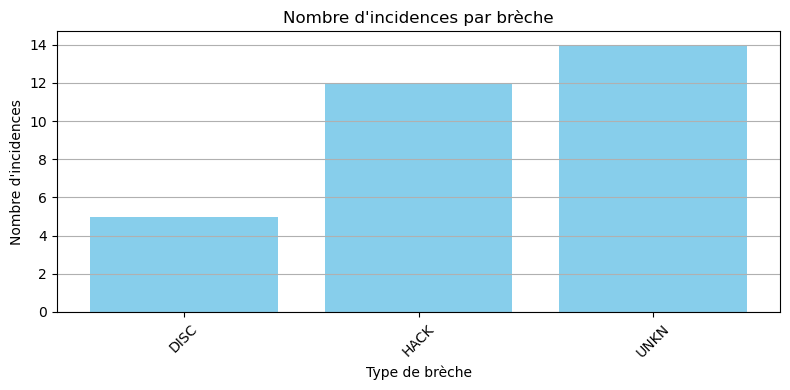

In [ ]:
# Compter les occurrences par année
yearly_counts = df_filtré['breach_type'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par brèche")
plt.xlabel("Type de brèche")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Perceptron 

In [ ]:
corpus

('le chat mange la souris',
 'le chien regarde le canard',
 'le canard regarde le chat')

In [ ]:
d.split()

['le', 'canard', 'regarde', 'le', 'chat']

In [ ]:
d

'le canard regarde le chat'